In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import gzip
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns

In [3]:
FILES = glob.glob('voting_predict/*.msg.gz')

DATAFRAMES = []
for f in FILES:
    print f
    with gzip.open(f) as f:
        DATAFRAMES.append(pd.read_msgpack(f))

DATAFRAMES[0]

voting_predict/0.18_0.42.msg.gz
voting_predict/0.44_0.38.msg.gz
voting_predict/0.5_0.12.msg.gz
voting_predict/0.64_0.6.msg.gz
voting_predict/0.34_0.26.msg.gz
voting_predict/0.2_0.66.msg.gz
voting_predict/0.22_0.14.msg.gz
voting_predict/0.7_0.64.msg.gz
voting_predict/0.34_0.4.msg.gz
voting_predict/0.88_0.84.msg.gz
voting_predict/0.74_0.74.msg.gz
voting_predict/0.62_0.46.msg.gz
voting_predict/0.86_0.9.msg.gz
voting_predict/0.12_0.58.msg.gz
voting_predict/0.2_0.78.msg.gz
voting_predict/0.86_0.72.msg.gz
voting_predict/0.34_0.38.msg.gz
voting_predict/0.68_0.42.msg.gz
voting_predict/0.44_0.26.msg.gz
voting_predict/0.52_0.14.msg.gz
voting_predict/0.12_0.46.msg.gz
voting_predict/0.56_0.4.msg.gz
voting_predict/0.62_0.58.msg.gz
voting_predict/0.8_0.62.msg.gz
voting_predict/0.3_0.88.msg.gz
voting_predict/0.52_0.18.msg.gz
voting_predict/0.4_0.3.msg.gz
voting_predict/0.26_0.1.msg.gz
voting_predict/0.6_0.86.msg.gz
voting_predict/0.2_0.74.msg.gz
voting_predict/0.34_0.34.msg.gz
voting_predict/0.62_0.5

voting_predict/0.66_0.34.msg.gz
voting_predict/0.3_0.16.msg.gz
voting_predict/0.7_0.4.msg.gz
voting_predict/0.38_0.5.msg.gz
voting_predict/0.9_0.24.msg.gz
voting_predict/0.82_0.36.msg.gz
voting_predict/0.14_0.74.msg.gz
voting_predict/0.1_0.48.msg.gz
voting_predict/0.72_0.58.msg.gz
voting_predict/0.12_0.6.msg.gz
voting_predict/0.24_0.38.msg.gz
voting_predict/0.42_0.4.msg.gz
voting_predict/0.78_0.42.msg.gz
voting_predict/0.42_0.14.msg.gz
voting_predict/0.68_0.7.msg.gz
voting_predict/0.54_0.26.msg.gz
voting_predict/0.72_0.46.msg.gz
voting_predict/0.1_0.56.msg.gz
voting_predict/0.64_0.74.msg.gz
voting_predict/0.82_0.28.msg.gz
voting_predict/0.6_0.22.msg.gz
voting_predict/0.2_0.6.msg.gz
voting_predict/0.88_0.32.msg.gz
voting_predict/0.54_0.38.msg.gz
voting_predict/0.4_0.54.msg.gz
voting_predict/0.32_0.14.msg.gz
voting_predict/0.24_0.26.msg.gz
voting_predict/0.82_0.24.msg.gz
voting_predict/0.14_0.66.msg.gz
voting_predict/0.9_0.36.msg.gz
voting_predict/0.64_0.78.msg.gz
voting_predict/0.44_0.8

voting_predict/0.1_0.76.msg.gz
voting_predict/0.84_0.5.msg.gz
voting_predict/0.84_0.26.msg.gz
voting_predict/0.12_0.64.msg.gz
voting_predict/0.88_0.6.msg.gz
voting_predict/0.46_0.72.msg.gz
voting_predict/0.66_0.88.msg.gz
voting_predict/0.74_0.48.msg.gz
voting_predict/0.28_0.32.msg.gz
voting_predict/0.7_0.58.msg.gz
voting_predict/0.22_0.28.msg.gz
voting_predict/0.52_0.36.msg.gz
voting_predict/0.38_0.84.msg.gz
voting_predict/0.72_0.8.msg.gz
voting_predict/0.62_0.64.msg.gz
voting_predict/0.52_0.3.msg.gz
voting_predict/0.7_0.46.msg.gz
voting_predict/0.74_0.56.msg.gz
voting_predict/0.84_0.38.msg.gz
voting_predict/0.36_0.72.msg.gz
voting_predict/0.16_0.88.msg.gz
voting_predict/0.58_0.32.msg.gz
voting_predict/0.52_0.28.msg.gz
voting_predict/0.28_0.2.msg.gz
voting_predict/0.22_0.36.msg.gz
voting_predict/0.48_0.84.msg.gz
voting_predict/0.2_0.44.msg.gz
voting_predict/0.58_0.7.msg.gz
voting_predict/0.16_0.84.msg.gz
voting_predict/0.84_0.34.msg.gz
voting_predict/0.12_0.76.msg.gz
voting_predict/0.8

voting_predict/0.46_0.3.msg.gz
voting_predict/0.42_0.28.msg.gz
voting_predict/0.4_0.76.msg.gz
voting_predict/0.58_0.84.msg.gz
voting_predict/0.32_0.36.msg.gz
voting_predict/0.64_0.56.msg.gz
voting_predict/0.3_0.3.msg.gz
voting_predict/0.5_0.86.msg.gz
voting_predict/0.72_0.64.msg.gz
voting_predict/0.84_0.7.msg.gz
voting_predict/0.1_0.74.msg.gz
voting_predict/0.48_0.32.msg.gz
voting_predict/0.14_0.48.msg.gz
voting_predict/0.26_0.72.msg.gz
voting_predict/0.9_0.18.msg.gz
voting_predict/0.16_0.1.msg.gz
voting_predict/0.24_0.3.msg.gz
voting_predict/0.6_0.1.msg.gz
voting_predict/0.32_0.28.msg.gz
voting_predict/0.4_0.68.msg.gz
voting_predict/0.28_0.84.msg.gz
voting_predict/0.42_0.36.msg.gz
voting_predict/0.14_0.56.msg.gz
voting_predict/0.82_0.14.msg.gz
voting_predict/0.74_0.1.msg.gz
voting_predict/0.64_0.48.msg.gz
voting_predict/0.38_0.32.msg.gz
voting_predict/0.76_0.88.msg.gz
voting_predict/0.56_0.72.msg.gz
voting_predict/0.28_0.88.msg.gz
voting_predict/0.66_0.32.msg.gz
voting_predict/0.32_0.

voting_predict/0.4_0.2.msg.gz
voting_predict/0.62_0.28.msg.gz
voting_predict/0.8_0.12.msg.gz
voting_predict/0.12_0.36.msg.gz
voting_predict/0.84_0.74.msg.gz
voting_predict/0.78_0.84.msg.gz
voting_predict/0.52_0.42.msg.gz
voting_predict/0.5_0.3.msg.gz
voting_predict/0.82_0.7.msg.gz
voting_predict/0.68_0.14.msg.gz
voting_predict/0.86_0.24.msg.gz
voting_predict/0.8_0.34.msg.gz
voting_predict/0.28_0.46.msg.gz
voting_predict/0.84_0.52.msg.gz
voting_predict/0.36_0.18.msg.gz
voting_predict/0.58_0.58.msg.gz
voting_predict/0.22_0.42.msg.gz
voting_predict/0.78_0.9.msg.gz
voting_predict/0.58_0.2.msg.gz
voting_predict/0.76_0.54.msg.gz
voting_predict/0.5_0.44.msg.gz
voting_predict/0.72_0.1.msg.gz
voting_predict/0.18_0.14.msg.gz
voting_predict/0.22_0.3.msg.gz
voting_predict/0.58_0.46.msg.gz
voting_predict/0.46_0.18.msg.gz
voting_predict/0.7_0.32.msg.gz
voting_predict/0.74_0.22.msg.gz
voting_predict/0.28_0.58.msg.gz
voting_predict/0.18_0.18.msg.gz
voting_predict/0.44_0.62.msg.gz
voting_predict/0.52_0

voting_predict/0.14_0.4.msg.gz
voting_predict/0.5_0.64.msg.gz
voting_predict/0.1_0.6.msg.gz
voting_predict/0.86_0.2.msg.gz
voting_predict/0.22_0.62.msg.gz
voting_predict/0.8_0.22.msg.gz
voting_predict/0.28_0.3.msg.gz
voting_predict/0.62_0.18.msg.gz
voting_predict/0.84_0.44.msg.gz
voting_predict/0.44_0.66.msg.gz
voting_predict/0.52_0.2.msg.gz
voting_predict/0.52_0.54.msg.gz
voting_predict/0.72_0.9.msg.gz
voting_predict/0.34_0.78.msg.gz
voting_predict/0.86_0.32.msg.gz
voting_predict/0.2_0.38.msg.gz
voting_predict/0.14_0.82.msg.gz
voting_predict/0.78_0.1.msg.gz
voting_predict/0.12_0.18.msg.gz
voting_predict/0.74_0.34.msg.gz
voting_predict/0.7_0.24.msg.gz
voting_predict/0.2_0.26.msg.gz
voting_predict/0.88_0.7.msg.gz
voting_predict/0.34_0.66.msg.gz
voting_predict/0.22_0.54.msg.gz
voting_predict/0.44_0.78.msg.gz
voting_predict/0.5_0.52.msg.gz
voting_predict/0.76_0.42.msg.gz
voting_predict/0.64_0.82.msg.gz
voting_predict/0.28_0.42.msg.gz
voting_predict/0.74_0.38.msg.gz
voting_predict/0.7_0.28

voting_predict/0.9_0.52.msg.gz
voting_predict/0.68_0.82.msg.gz
voting_predict/0.62_0.4.msg.gz
voting_predict/0.26_0.38.msg.gz
voting_predict/0.48_0.78.msg.gz
voting_predict/0.56_0.26.msg.gz
voting_predict/0.48_0.7.msg.gz
voting_predict/0.38_0.66.msg.gz
voting_predict/0.58_0.64.msg.gz
voting_predict/0.36_0.24.msg.gz
voting_predict/0.44_0.4.msg.gz
voting_predict/0.62_0.32.msg.gz
voting_predict/0.86_0.18.msg.gz
voting_predict/0.34_0.52.msg.gz
voting_predict/0.68_0.28.msg.gz
voting_predict/0.2_0.12.msg.gz
voting_predict/0.1_0.4.msg.gz
voting_predict/0.72_0.84.msg.gz
voting_predict/0.18_0.36.msg.gz
voting_predict/0.76_0.76.msg.gz
voting_predict/0.14_0.6.msg.gz
voting_predict/0.5_0.66.msg.gz
voting_predict/0.28_0.64.msg.gz
voting_predict/0.26_0.4.msg.gz
voting_predict/0.4_0.6.msg.gz
voting_predict/0.46_0.24.msg.gz
voting_predict/0.8_0.16.msg.gz
voting_predict/0.4_0.88.msg.gz
voting_predict/0.12_0.32.msg.gz
voting_predict/0.18_0.28.msg.gz
voting_predict/0.44_0.52.msg.gz
voting_predict/0.5_0.7

,correct,game,mission,nll_correct,nll_picked,num_players,vote_count,vsid_prob,vsis_prob
0,False,18,0,-12.421207,-10.034059,6,1,0.42,0.18
1,False,18,0,-13.139394,-10.752246,6,2,0.42,0.18
2,False,18,0,-13.006334,-10.619186,6,3,0.42,0.18
3,False,18,0,-13.412177,-11.025029,6,4,0.42,0.18
4,False,18,0,-15.382834,-12.995686,6,5,0.42,0.18
5,False,18,1,-15.783697,-13.396549,6,6,0.42,0.18
6,False,18,1,-17.815328,-13.041031,6,7,0.42,0.18
7,False,18,1,-19.366510,-14.592213,6,8,0.42,0.18
8,False,18,1,-20.768018,-15.993722,6,9,0.42,0.18
9,False,18,1,-25.125206,-20.350910,6,10,0.42,0.18


In [4]:
FIL = next(f for f in FILES if '0.7_0.3.' in f)

In [7]:
DATAFRAME = DATAFRAMES[FILES.index(FIL)]

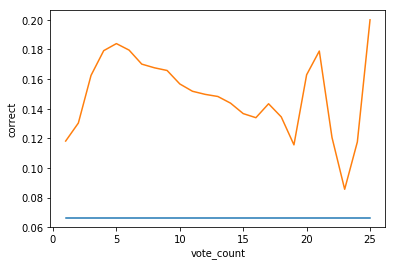

In [46]:
x = DATAFRAME[DATAFRAME.num_players == 5].groupby(['vote_count']).mean()
x.reset_index(level=0, inplace=True)
x['baseline'] = 1.0/15.0

sns.lineplot(data=x, x='vote_count', y='baseline')
sns.lineplot(data=x, x='vote_count', y='correct')